# People Analytics - End of year performance review
* **Context:** At the end of each year managers need to bucket their team members as High-Medium-Low performers
* **Objective:** Understand if based on key metrics used during the year we would be able to performe end of year bucketing as well as managers (or better?)

In [3]:
# import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import excel data
*Work related anonymized dataset and subset of original data*

In [2]:
df = pd.read_excel(r'9boxes_analysis_agg_vgreg.xlsx')
print('Shape date:',df.shape)

Shape date: (1988, 18)


In [4]:
df.columns

Index(['ID', 'Year', 'Working man-day', 'Touchpoint per head per day',
       '# oppy discussed per touchpoint', 'Pitch Rate (Top3)', 'Success Rate',
       'Wins per head per day', 'lab_submissions_count FINAL',
       'shad_submissions_count FINAL', 'Share proactive oppies', 'region',
       'Jobcode Title', '2020_PerformanceCategory', 'Tenure', 'Time in Grade',
       'Time in Job', 'Time In Position'],
      dtype='object')

In [5]:
# renaming columns to simply rest of analysis
df.rename(columns={'Working man-day':'active_days','Touchpoint per head per day':'tpppd','# oppy discussed per touchpoint':'opppt',\
                   'Pitch Rate (Top3)':'Pitch_rate','Wins per head per day':'wpppd','lab_submissions_count FINAL':'labs',\
                   'shad_submissions_count FINAL':'shadows','Share proactive oppies':'share_proactive','Jobcode Title':'Job_Title','2020_PerformanceCategory':'perf'}, inplace=True)
df.head()

,ID,Year,active_days,tpppd,opppt,Pitch_rate,Success Rate,wpppd,labs,shadows,share_proactive,region,Job_Title,perf,Tenure,Time in Grade,Time in Job,Time In Position
0,-468.0,2020,1,1.0,1.0,NaN,1.00,1.0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-310.4,2020,1,1.0,1.0,0.33,0.00,0.0,NaN,NaN,0.00,North America,"Dir, Market Management -2",Low,21.45,2.87,2.87,9.55
2,-179.2,2020,121,6.4,2.1,0.54,0.17,2.3,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1946.4,2020,4,1.0,2.0,0.56,0.38,0.8,NaN,NaN,0.13,EMEA,"Dir, Market Management -2",Medium,17.41,2.40,2.40,2.40
4,2180.0,2020,3,2.7,1.0,NaN,0.00,0.0,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1988.0,75443.698189,63954.558080,-468.00,39218.00,61753.60,68611.400,247512.00
Year,1988.0,2020.000000,0.000000,2020.00,2020.00,2020.00,2020.000,2020.00
active_days,1988.0,125.975855,70.333353,1.00,60.00,148.00,188.000,226.00
tpppd,1988.0,7.021579,2.482578,0.70,5.90,7.20,8.425,18.90
opppt,1974.0,2.324367,0.621746,0.10,2.00,2.30,2.600,9.00
Pitch_rate,1712.0,0.671589,0.146119,0.00,0.58,0.67,0.770,1.00
Success Rate,1974.0,0.241266,0.096986,0.00,0.19,0.23,0.280,1.00
wpppd,1988.0,3.837777,1.859841,0.00,2.70,3.70,4.900,13.30
labs,1046.0,10.173040,3.807281,1.00,8.00,11.00,12.000,22.00
shadows,1044.0,12.344828,6.327728,1.00,8.75,11.00,16.000,40.00


#### Handle Null values

In [7]:
df.isnull().sum()

ID                    0
Year                  0
active_days           0
tpppd                 0
opppt                14
Pitch_rate          276
Success Rate         14
wpppd                 0
labs                942
shadows             944
share_proactive      14
region              625
Job_Title           625
perf                668
Tenure              626
Time in Grade       625
Time in Job         625
Time In Position    625
dtype: int64

In [8]:
df[df['opppt'].isnull()].head()
# clearly seems to be mostyl team members from support fonctions

,ID,Year,active_days,tpppd,opppt,Pitch_rate,Success Rate,wpppd,labs,shadows,share_proactive,region,Job_Title,perf,Tenure,Time in Grade,Time in Job,Time In Position
83,18992.0,2020,1,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,EMEA,Area Manager,High,10.70,7.92,7.07,10.70
136,23945.6,2020,1,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Asia Pacific,HA.DIRECTOR.Director - Sales.,Medium,9.20,0.91,0.91,2.11
148,25020.8,2020,1,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,North America,"Sr Dir, Market Management",High,8.84,2.61,2.60,2.60
171,26770.4,2020,2,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,North America,Area Manager,Medium,8.38,4.49,4.49,4.49
192,27514.4,2020,1,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,North America,Area Manager,High,8.17,4.86,3.57,2.04


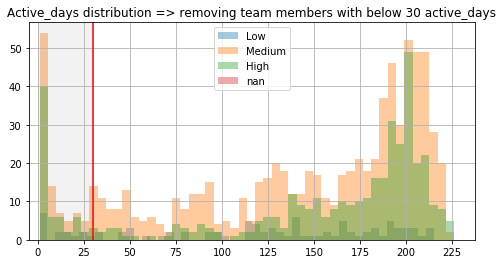

In [9]:
for p in ['Low','Medium','High','nan']:
    df[df['perf'] == p]['active_days'].hist(bins=50, figsize=(8,4), alpha=0.4, label=p)
plt.xticks(ticks=np.arange(0,240,25))
plt.axvline(x=30, color='red', fillstyle='left')
plt.axvspan(xmin=0, xmax=30, color='grey', alpha=0.1)
plt.xlim(left=-5)
plt.title('Active_days distribution => removing team members with below 30 active_days')
plt.legend()
plt.show()

In [10]:
# decide to cut below 30 for now
df_clean = df[df['active_days'] > 30]

In [11]:
df_clean.isnull().sum()

ID                    0
Year                  0
active_days           0
tpppd                 0
opppt                 0
Pitch_rate          120
Success Rate          0
wpppd                 0
labs                666
shadows             666
share_proactive       0
region              497
Job_Title           497
perf                535
Tenure              497
Time in Grade       497
Time in Job         497
Time In Position    497
dtype: int64

In [12]:
df_clean[df_clean['Pitch_rate'].isnull()].head()
# probably mostly team members who worked beginning of the year and don't work in same team anymore

,ID,Year,active_days,tpppd,opppt,Pitch_rate,Success Rate,wpppd,labs,shadows,share_proactive,region,Job_Title,perf,Tenure,Time in Grade,Time in Job,Time In Position
13,5719.2,2020,34,5.1,2.8,NaN,0.23,3.4,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,12700.0,2020,33,4.8,2.3,NaN,0.23,2.5,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,19677.6,2020,34,4.6,2.3,NaN,0.20,2.1,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,20957.6,2020,42,6.6,3.1,NaN,0.26,5.4,1.0,2.0,0.00,Asia Pacific,Market Manager,Medium,10.04,7.92,7.91,10.04
114,21826.4,2020,44,5.5,2.9,NaN,0.28,4.3,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Remove team members without output (perf)
df_clean_perf = df_clean[~df_clean['perf'].isnull()]

In [14]:
df_clean_perf.isnull().sum()

ID                    0
Year                  0
active_days           0
tpppd                 0
opppt                 0
Pitch_rate           26
Success Rate          0
wpppd                 0
labs                149
shadows             151
share_proactive       0
region                0
Job_Title             0
perf                  0
Tenure                0
Time in Grade         0
Time in Job           0
Time In Position      0
dtype: int64

In [15]:
df_clean_perf['labs'].fillna(value=0,inplace=True) # set to 0
df_clean_perf['shadows'].fillna(value=0,inplace=True) # set to 0

C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
df_clean_perf[df_clean_perf['Pitch_rate'].isnull()].head()

,ID,Year,active_days,tpppd,opppt,Pitch_rate,Success Rate,wpppd,labs,shadows,share_proactive,region,Job_Title,perf,Tenure,Time in Grade,Time in Job,Time In Position
106,20957.6,2020,42,6.6,3.1,NaN,0.26,5.4,1.0,2.0,0.00,Asia Pacific,Market Manager,Medium,10.04,7.92,7.91,10.04
205,29139.2,2020,35,7.2,2.7,NaN,0.34,6.5,0.0,0.0,0.03,EMEA,Sr Account Rep - Media Sales,Medium,7.90,5.49,0.66,0.66
246,31234.4,2020,49,5.7,3.1,NaN,0.20,3.6,2.0,1.0,0.10,Asia Pacific,Market Manager,Medium,7.33,2.87,2.87,7.33
268,33912.0,2020,47,6.6,3.1,NaN,0.16,3.3,0.0,0.0,0.14,EMEA,Sr Account Rep - Media Sales,Medium,7.02,3.16,0.87,0.87
334,36757.6,2020,42,7.0,3.1,NaN,0.24,5.2,0.0,0.0,0.11,Asia Pacific,Sr Account Rep - Media Sales,Medium,6.46,0.85,0.85,0.85


In [17]:
df_clean_final = df_clean_perf[~df_clean_perf['Pitch_rate'].isnull()]
print('Shape clean:',df_clean_final.shape)

Shape clean: (1119, 18)


In [18]:
df_clean_final.isnull().sum()

ID                  0
Year                0
active_days         0
tpppd               0
opppt               0
Pitch_rate          0
Success Rate        0
wpppd               0
labs                0
shadows             0
share_proactive     0
region              0
Job_Title           0
perf                0
Tenure              0
Time in Grade       0
Time in Job         0
Time In Position    0
dtype: int64

## Analysis
### Distributions
#### (A) Tables

In [19]:
df_clean_final['perf'].value_counts()[['High','Medium','Low']]

High      348
Medium    694
Low        77
Name: perf, dtype: int64

In [20]:
df_clean_final['region'].value_counts(normalize=True)

EMEA             0.500447
North America    0.254692
Asia Pacific     0.161752
Latin America    0.083110
Name: region, dtype: float64

In [21]:
for r in df_clean_final['region'].unique():
    print(r)
    print(round(df_clean_final[df_clean_final['region'] == r]['perf'].value_counts(normalize=True),2)[['High','Medium','Low']])

North America
High      0.32
Medium    0.61
Low       0.07
Name: perf, dtype: float64
EMEA
High      0.32
Medium    0.60
Low       0.09
Name: perf, dtype: float64
Latin America
High      0.29
Medium    0.69
Low       0.02
Name: perf, dtype: float64
Asia Pacific
High      0.29
Medium    0.67
Low       0.04
Name: perf, dtype: float64


**Note:** all super regions have almost the same share of each groups

In [22]:
# input metrics focus define for rest of analysis
input_m = ['active_days','tpppd','opppt','Pitch_rate','Success Rate','wpppd','labs','shadows','share_proactive','Tenure'] # could include also 3x Time features

In [23]:
df_summary = round(df_clean_final.groupby('perf')[input_m].median(),2).reset_index()
df_summary['index'] = df_summary['perf'].replace({'High':2,'Medium':1,'Low':0})
df_summary.set_index('index').sort_values(by='index', ascending=False)

,perf,active_days,tpppd,opppt,Pitch_rate,Success Rate,wpppd,labs,shadows,share_proactive,Tenure
index,,,,,,,,,,,
2,High,188.5,8.0,2.4,0.70,0.25,4.7,12.0,13.0,0.12,4.38
1,Medium,178.0,7.6,2.3,0.68,0.23,4.0,10.0,11.0,0.11,3.47
0,Low,142.0,6.7,2.2,0.63,0.21,2.8,9.0,8.0,0.11,3.05


In [24]:
df_summary_sr = round(df_clean_final.groupby(['region','perf'])[input_m].median(),2).reset_index()
df_summary_sr['index'] = df_summary_sr['perf'].replace({'High':2,'Medium':1,'Low':0})
df_summary_sr.set_index('index').sort_values(by=['region','index'], ascending=False)

,region,perf,active_days,tpppd,opppt,Pitch_rate,Success Rate,wpppd,labs,shadows,share_proactive,Tenure
index,,,,,,,,,,,,
2,North America,High,197.0,7.9,2.4,0.69,0.25,4.4,12.0,14.0,0.13,4.28
1,North America,Medium,198.0,7.3,2.3,0.67,0.23,3.8,11.0,11.0,0.12,3.66
0,North America,Low,190.0,6.7,2.2,0.65,0.22,3.2,10.0,11.0,0.11,4.20
2,Latin America,High,209.0,9.0,2.4,0.75,0.25,5.3,13.0,12.0,0.13,5.23
1,Latin America,Medium,207.0,8.7,2.4,0.72,0.23,4.7,11.0,11.0,0.10,4.66
0,Latin America,Low,175.5,8.7,2.3,0.72,0.25,4.9,12.5,10.5,0.10,5.74
2,EMEA,High,167.0,8.3,2.3,0.70,0.24,4.5,11.0,12.0,0.11,4.36
1,EMEA,Medium,144.5,7.8,2.3,0.68,0.22,3.9,9.0,9.5,0.09,3.24
0,EMEA,Low,126.0,6.7,2.1,0.62,0.19,2.7,7.0,7.0,0.09,2.98


#### (B) Histogram

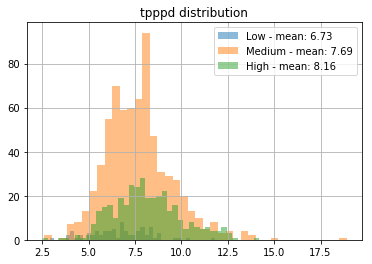

In [25]:
metric = 'tpppd'
for p in df_clean_final['perf'].unique():
    df_clean_final[df_clean_final['perf'] == p][metric].hist(bins=40, label='{} - mean: {:.2f}'.format(p,df_clean_final[df_clean_final['perf'] == p][metric].mean()), alpha=0.5)
plt.title('{} distribution'.format(metric))
plt.legend()
plt.show()

#### (C) Boxplots

In [26]:
import seaborn as sns

C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


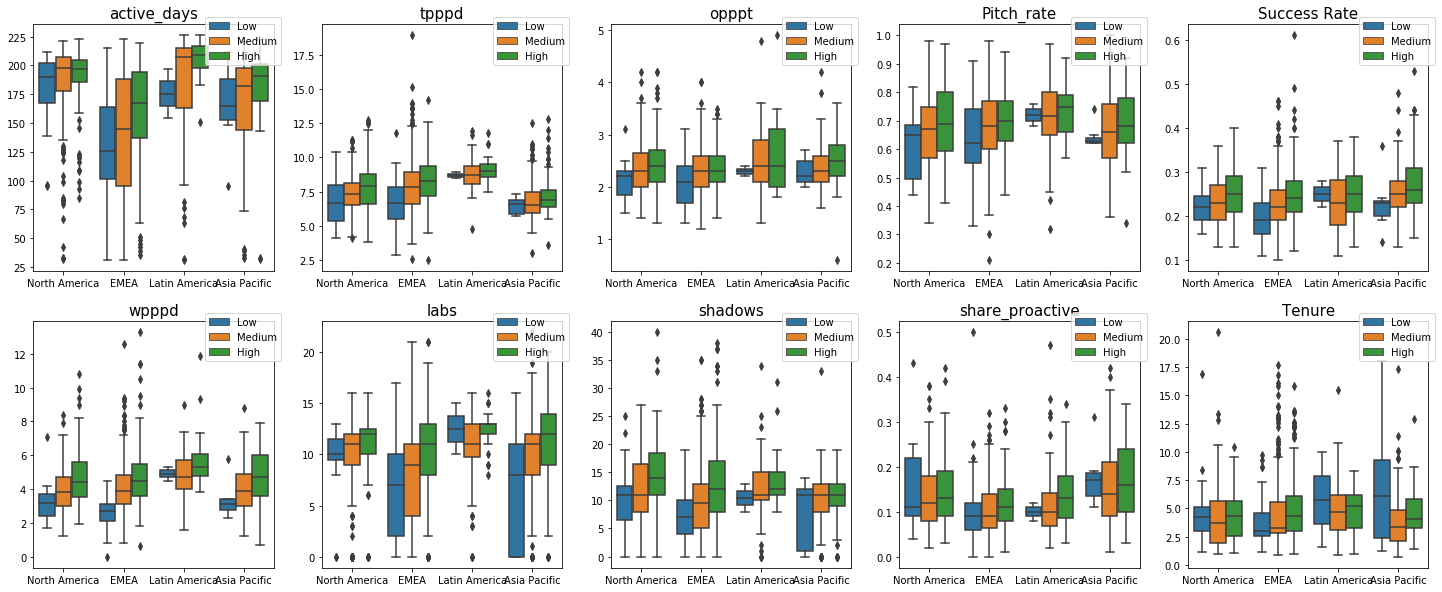

In [27]:
fig, ax =plt.subplots(2,5, figsize=(25,10))
x = 0
y = 0
for m in input_m:
#sns.countplot(df['batting'], ax=ax[0])
#sns.countplot(df['bowling'], ax=ax[1])
    ax[y,x] = sns.boxplot(x='region', y=m, hue='perf', data=df_clean_final, ax=ax[y,x])
    ax[y,x].legend(loc='upper right',bbox_to_anchor=(1.05,1.05))
    ax[y,x].set_xlabel("")
    ax[y,x].set_ylabel("")
    ax[y,x].set_title(m, fontsize=15)
    if x < 4:
        x = x+1
    elif x == 4:
        y = 1
        x = 0
#ax[0,0] = sns.boxplot(x='region', y=metric, hue='perf', data=df_clean_final, ax=ax[0,0])
#ax[0,1] = sns.boxplot(x='region', y=metric, hue='perf', data=df_clean_final, ax=ax[0,1])
#ax[0,2] = sns.boxplot(x='region', y=metric, hue='perf', data=df_clean_final, ax=ax[0,2])
#ax[0,3] = sns.boxplot(x='region', y=metric, hue='perf', data=df_clean_final, ax=ax[0,3])
#ax[0,4] = sns.boxplot(x='region', y=metric, hue='perf', data=df_clean_final, ax=ax[0,4])

fig.show()

#fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,6))
#ax[0] = sns.boxplot(x='region', y=metric, hue='perf', data=df_clean_final)
#ax[1] = sns.boxplot(x='region', y=metric, hue='perf', data=df_clean_final)
#ax[2] = sns.boxplot(x='region', y=metric, hue='perf', data=df_clean_final)
#labels[0] = 'header1'
#labels[1] = 'header2'
#ax.set_xticklabels(labels)
#ax.legend(loc='best')

**Comments on Boxplots (input variables)**:
* Almost all metrics and region cuts shows "high" performers achieving higher results => seems to indicate those metrics are valid to track team members performance
    * Especially clear for wins per person per day
    * Interesting to also call-out "high" performer as the one with more shadows and labs
* Only exceptions:
    * "Low" performers slightly over-performing on some metrics in Latam (very low number of low performers means hard to interpret data point, n=2)
    * Tenure seems to be less impactgul on performance

In [28]:
def boxplot_sns(metric):
    sns.boxplot(x='region', y=metric, hue='perf',
                 data=df_clean_final)
    plt.title('{} boxplots per regions'.format(metric))
    plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1))
    plt.show()

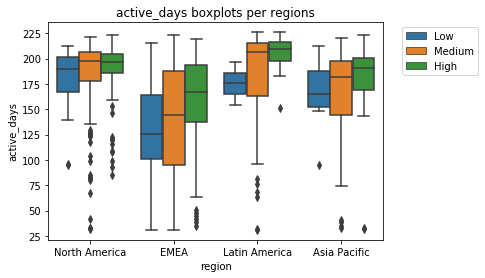

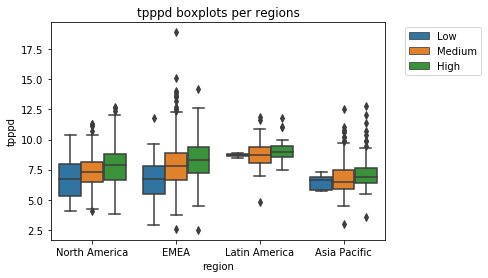

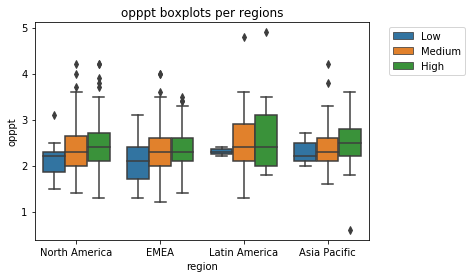

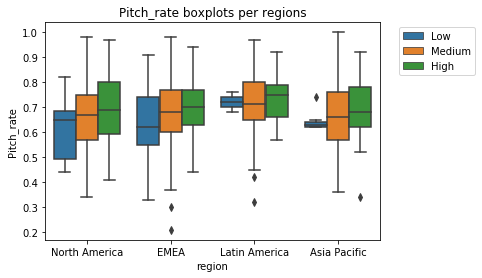

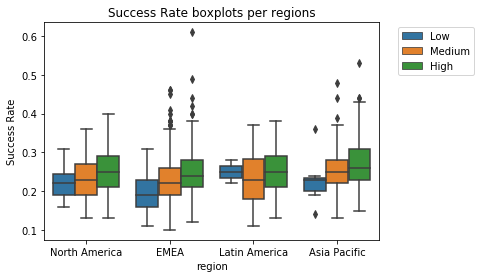

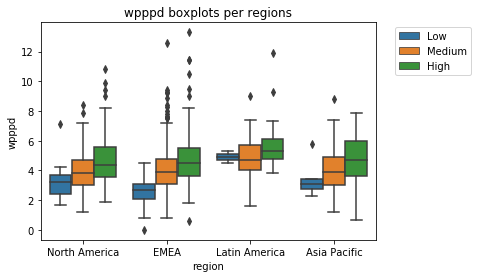

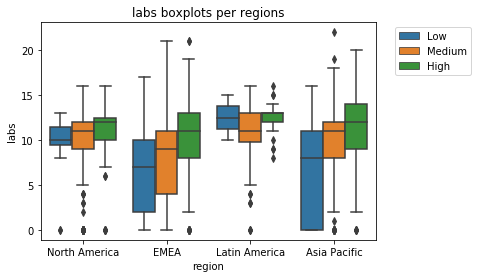

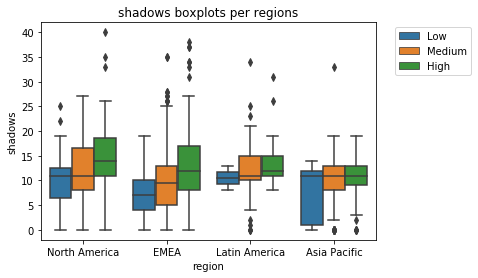

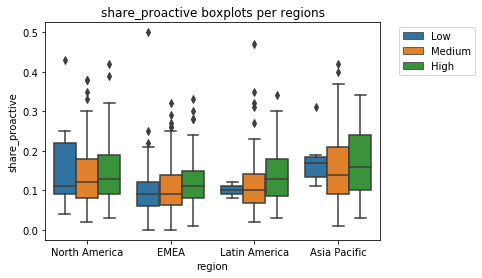

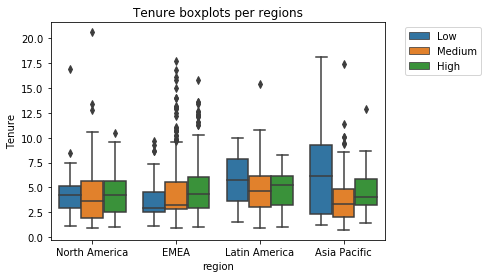

In [29]:
for m in input_m:
    boxplot_sns(m)

### Scatter plot

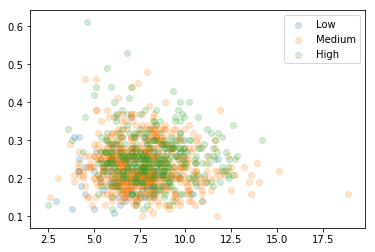

In [30]:
for p in df_clean_final['perf'].unique():
    df = df_clean_final[df_clean_final['perf'] == p]
    plt.scatter(x=df['tpppd'], y=df['Success Rate'], label=p, alpha=0.2)
plt.legend()
plt.show()

### Correlation (for input features)

#### (A) Pairplot

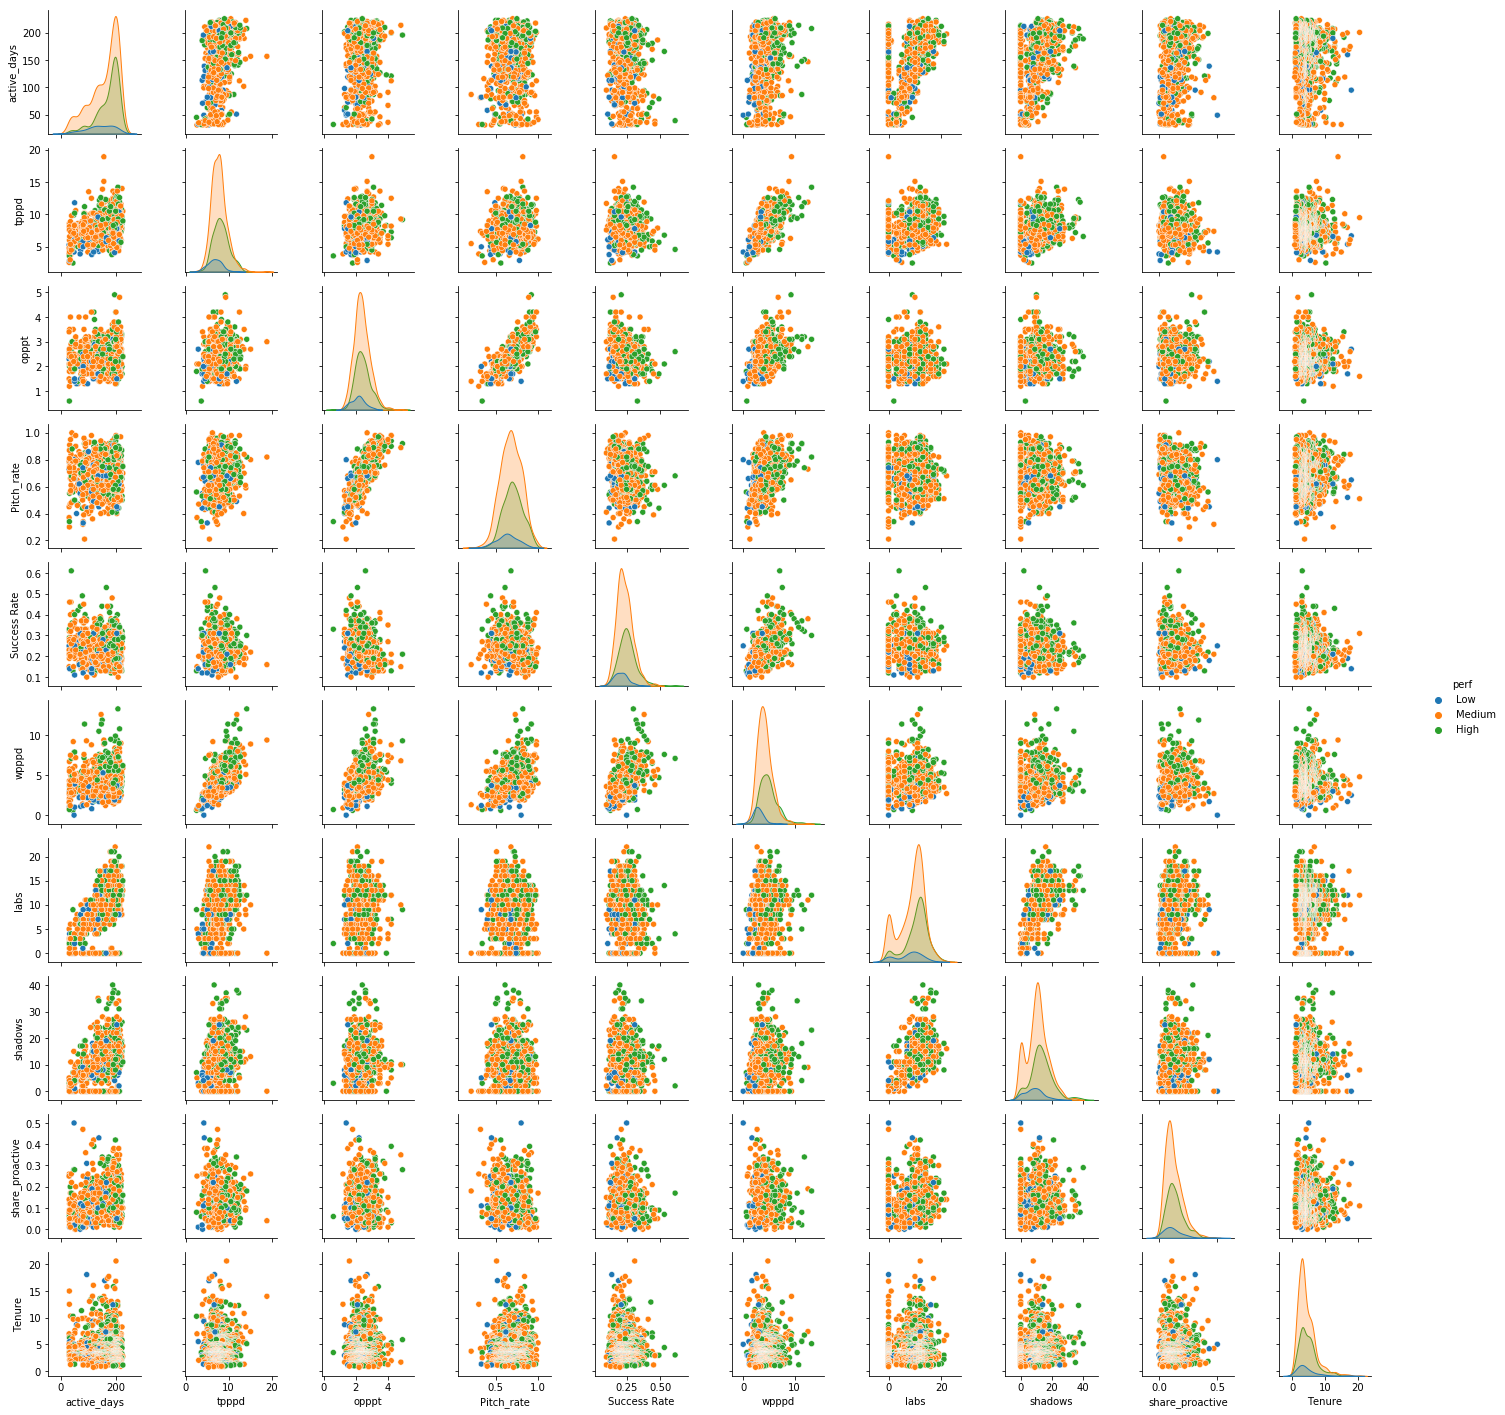

In [31]:
sns.pairplot(df_clean_final[np.append('perf',input_m)], hue='perf', height=2)
plt.show()

#### (B) Correlation matrix

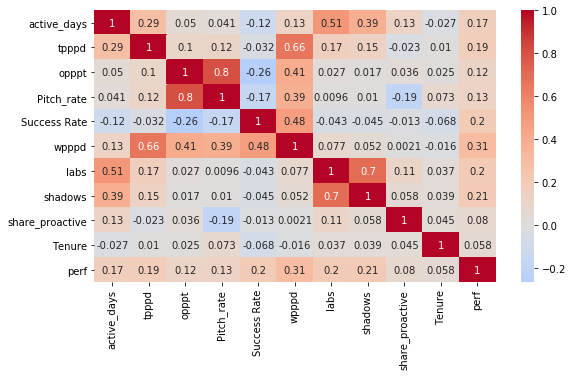

In [97]:
input_m_perf = ['active_days','tpppd','opppt','Pitch_rate','Success Rate','wpppd','labs','shadows','share_proactive','Tenure','perf']
plt.figure(figsize=(9,5))
corrMatrix = df_clean_final.replace({'High':2,'Medium':1,'Low':0})[input_m_perf].corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', center=0)
plt.show()

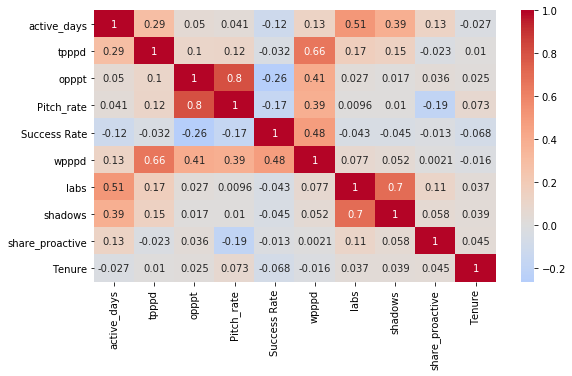

In [87]:
# https://datatofish.com/correlation-matrix-pandas/
plt.figure(figsize=(9,5))
corrMatrix = df_clean_final[input_m].corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', center=0)
plt.show()

**Comments on correlation:**
* **Oppies pitched per touchpoints** highly positively correlated with Pitch_rate (0.8) => seems to confirm that Pitch rate is a good metric to monitor
* **Wins per person per day** is the metric with the highest positive correlation with other key input metirc (tpppd: 0.66, opppt: 0.41, Pitch_rate: 0.39, Success Rate: 0.48) => seems to indicate that if we had to choose only one metric this could be the one
* **Success Rate** has a negative correlation to active_days (-0.12), opppt (-0.26) and Pitch_rate (-0.17) => could potentially be indicating that higher volume can hurt success rate (could also be under under-lying variables)
* Active_days are positively correlated with touchpoints pppd => seems to indicate that team members working more or here for longer time achieve higher volume (goes against assumption that some team members would only log on certain days to inflate tpppd metric)
* Share_proactive is negatively correlated with "Pitch rate" (-0.19) => makes sense as wouldn't be able to pitch too many oppies
* **Labs and shadows** have a high positive correlation to each other (0.7) and are both positively correlated to number of active_days (0.51 and 0.39)
* Tenure has very low correlation with all metrics

## ML Models

In [33]:
# focusing on one super region 'EMEA' to control for impact of regions
df_dt = df_clean_final[df_clean_final['region'] == 'EMEA'][['tpppd','opppt','Pitch_rate','Success Rate','wpppd','share_proactive','Job_Title','perf']]
encoded_df_dt = pd.get_dummies(data=df_dt, columns=['Job_Title'])

#### Encoding

In [34]:
# trying encoding
# https://machinelearningmastery.com/feature-selection-with-categorical-data/#:~:text=The%20two%20most%20commonly%20used,and%20the%20mutual%20information%20statistic
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(df_dt[['Job_Title','perf']])
print(oe.categories_)
job_encoded = oe.transform(df_dt[['Job_Title','perf']])
df_dt['job_title_encoded'] = job_encoded[:,0]
X_encoded = df_dt.drop(columns=['Job_Title','perf']).values
df_dt.head()

[array(['Account Manager, Small', 'Area Manager',
       'Associate Market Manager', 'Field Sales, SME',
       'Lodging Partner Associate III', 'Market Associate',
       'Market Manager', 'Product Manager, Pricing',
       'Sr Commercial Specialist', 'Sr Market Manager',
       'Support Coordinator'], dtype=object), array(['High', 'Low', 'Medium'], dtype=object)]


,tpppd,opppt,Pitch_rate,Success Rate,wpppd,share_proactive,Job_Title,perf,job_title_encoded
6,8.0,2.0,0.59,0.27,4.4,0.11,Market Manager,Medium,6.0
10,9.6,2.4,0.69,0.20,4.4,0.14,Market Manager,Medium,6.0
11,10.1,2.0,0.60,0.23,4.6,0.07,Associate Market Manager,Medium,2.0
14,8.2,2.2,0.64,0.20,3.7,0.08,Associate Market Manager,Medium,2.0
15,8.3,3.4,0.84,0.16,4.5,0.14,Market Manager,High,6.0


In [35]:
X = encoded_df_dt.drop(columns='perf').values
y = encoded_df_dt.perf.values

#### StandardScaler

In [36]:
from sklearn.preprocessing import StandardScaler

# Create Standard Scaler
scaler = StandardScaler()
scaler_hot = StandardScaler()

# Rescale data
X_rescaled = scaler.fit_transform(X_encoded)
X_rescaled_hot = scaler_hot.fit_transform(X)

#### Train_test_split

In [37]:
from sklearn.model_selection import train_test_split
y_binary = (y == 'High')*1 # High = 1, Not-high = 0

X_tr, X_va, y_tr, y_va = train_test_split(X_rescaled_hot, y_binary, test_size=0.2)
print('X_train shape:',X_tr.shape)
print('y_train shape:',y_tr.shape)
print('X_valid shape:',X_va.shape)
print('y_valid shape:',y_va.shape)

X_train shape: (448, 17)
y_train shape: (448,)
X_valid shape: (112, 17)
y_valid shape: (112,)


#### Baseline (accuracy)

In [38]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
base = DummyClassifier()
base.fit(X_tr, y_tr)
print('Baseline accuracy: {:.3f}'.format(base.score(X_va, y_va)))
print('Baseline f1_score: {:.3f}'.format(f1_score(y_true=y_va, y_pred=base.predict(X_va))))

Baseline accuracy: 0.670
Baseline f1_score: 0.000


### (A) Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()

#### non standardize

In [41]:
dt.fit(X,y)

DecisionTreeClassifier()

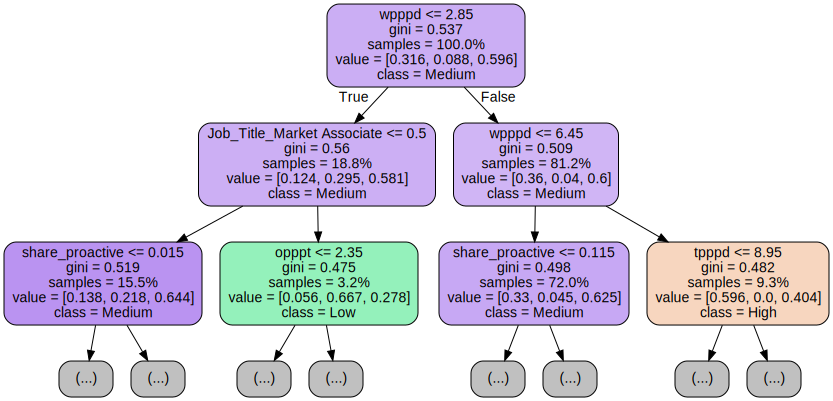

In [42]:
from sklearn.tree import export_graphviz
import graphviz
# Export decision tree
dot_data = export_graphviz(
    dt, out_file=None, max_depth=2,
    feature_names=encoded_df_dt.drop(columns='perf').columns, class_names=dt.classes_,
    filled=True, rounded=True, proportion=True   
)

# not sure about order of classes: https://stackoverflow.com/questions/39476020/get-feature-and-class-names-into-decision-tree-using-export-graphviz

# Display it
graphviz.Source(dot_data)

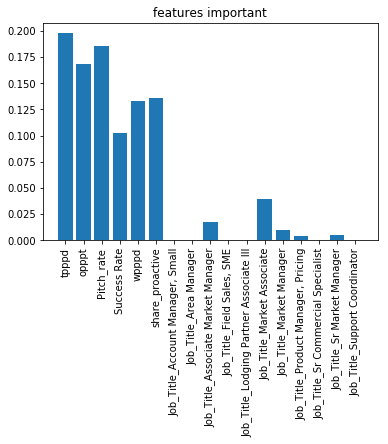

In [43]:
plt.bar(np.arange(0,len(dt.feature_importances_)),dt.feature_importances_)
plt.xticks(ticks=np.arange(0,len(dt.feature_importances_)),labels=encoded_df_dt.drop(columns='perf').columns, rotation=90)
plt.title('features important')
plt.show()

#### standardize

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [45]:
# dt_std = Pipeline([
  #  ('scaler',StandardScaler()),
  #  ('dtree',DecisionTreeClassifier())
#])

dt_std = DecisionTreeClassifier()

In [46]:
dt_std.fit(X_rescaled,y)

DecisionTreeClassifier()

In [47]:
dt_std.classes_

array(['High', 'Low', 'Medium'], dtype=object)

In [48]:
dt_std.feature_importances_
# is input variable scaled here or not?

array([0.23273326, 0.15563048, 0.17067291, 0.10218742, 0.14780013,
       0.13219046, 0.05878535])

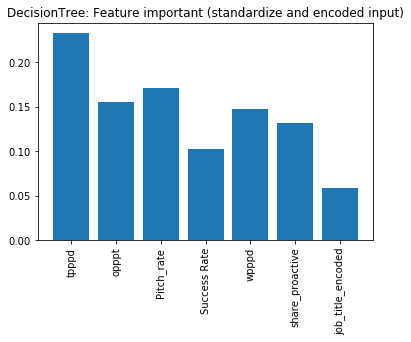

In [49]:
plt.bar(np.arange(0,len(dt_std.feature_importances_)),dt_std.feature_importances_)
plt.xticks(ticks=np.arange(0,len(dt_std.feature_importances_)),labels=df_dt.drop(columns=['Job_Title','perf']), rotation=90)
plt.title('DecisionTree: Feature important (standardize and encoded input)')
plt.show()

#### Accuracy

In [50]:
dt_model = DecisionTreeClassifier()

In [51]:
dt_model.fit(X_tr, y_tr)
print('DecisionTree untuned model accuracy: {:.3f}'.format(dt_model.score(X_va, y_va)))
print('DecisionTree untuned f1_score: {:.3f}'.format(f1_score(y_true=y_va, y_pred=dt_model.predict(X_va))))
# imbalanced data set with "only" 30% of positive class shall be assessed with f1-score instead of accuracy?

DecisionTree untuned model accuracy: 0.616
DecisionTree untuned f1_score: 0.469


### (B) Logistic Regression (standardize data)

In [52]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_rescaled,y)

importance = logreg.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00375
Feature: 1, Score: -0.17027
Feature: 2, Score: 0.23051
Feature: 3, Score: 0.13273
Feature: 4, Score: 0.84843
Feature: 5, Score: 0.19802
Feature: 6, Score: 0.03989


In [53]:
logreg.coef_.shape

(3, 7)

In [54]:
logreg.classes_

array(['High', 'Low', 'Medium'], dtype=object)

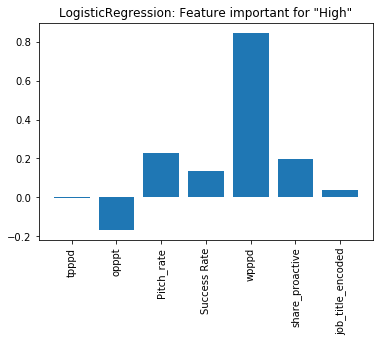

In [55]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=np.arange(0,len(importance)), labels=df_dt.drop(columns=['Job_Title','perf']).columns, rotation=90)
plt.title('LogisticRegression: Feature important for "High"')
plt.show()

#### Accuracy

In [56]:
logreg_model = LogisticRegression()
logreg_model.fit(X_tr, y_tr)
print('LogisticRegression untuned model accuracy: {:.3f}'.format(logreg_model.score(X_va, y_va)))
print('LogisticRegression untuned f1_score: {:.3f}'.format(f1_score(y_true=y_va, y_pred=logreg_model.predict(X_va))))

LogisticRegression untuned model accuracy: 0.705
LogisticRegression untuned f1_score: 0.267


### (C) RandomForest (standardize data)

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_rescaled,y)

importance_rf = rf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.18309
Feature: 1, Score: 0.13140
Feature: 2, Score: 0.16684
Feature: 3, Score: 0.13935
Feature: 4, Score: 0.18311
Feature: 5, Score: 0.13921
Feature: 6, Score: 0.05698


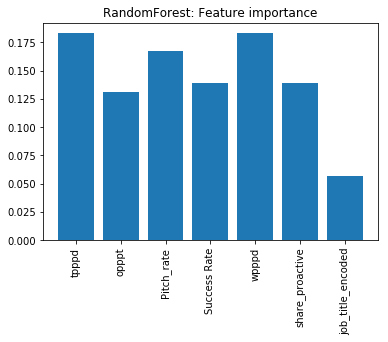

In [58]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance_rf)
plt.xticks(ticks=np.arange(0,len(importance)), labels=df_dt.drop(columns=['Job_Title','perf']).columns, rotation=90)
plt.title('RandomForest: Feature importance')
plt.show()

#### Accuracy

In [59]:
rf_model = RandomForestClassifier()
rf_model.fit(X_tr, y_tr)
print('RandomForest untuned model accuracy: {:.3f}'.format(rf_model.score(X_va, y_va)))
print('RandomForest untuned f1_score: {:.3f}'.format(f1_score(y_true=y_va, y_pred=rf_model.predict(X_va))))

RandomForest untuned model accuracy: 0.679
RandomForest untuned f1_score: 0.333


### (D) K-NN

In [60]:
from sklearn.cluster import KMeans

In [61]:
features = ['active_days','tpppd','opppt','Pitch_rate','Success Rate','wpppd','labs','shadows','share_proactive','Tenure','Time in Grade']

In [62]:
# Normalize features in each super region
newdata = pd.DataFrame(columns=df_clean_final.columns)

for sr in df_clean_final['region'].unique():
    data_sr = df_clean_final[df_clean_final['region'] == sr]
    X_k = data_sr[features].values
    print(data_sr.shape)
    scaler = StandardScaler().fit(X_k)
    X_kmeans = scaler.transform(X_k)
    data_sr[features] = X_kmeans
    newdata = pd.concat([newdata,data_sr])
X_kmeans = newdata[features].values

(285, 18)


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(560, 18)


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(93, 18)


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(181, 18)


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [63]:
X_kmeans.shape

(1119, 11)

#### KMeans clustering (with init_centroids)

In [64]:
# Features
features = ['active_days','tpppd','opppt','Pitch_rate','Success Rate','wpppd','labs','shadows','share_proactive','Tenure','Time in Grade']
cluster_labels = ['High','Medium','Low']
init_array = np.array([[ 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], # High
                           [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Medium
                           [ -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2], # Low
                          ])
# Perform clustering
km = KMeans(n_clusters=3, init=init_array, random_state=10, max_iter=5)
km.fit(X_kmeans)

C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=array([[ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]]),
       max_iter=5, n_clusters=3, random_state=10)

In [65]:
y_kmeans = km.predict(X_kmeans)
print('K-means y_pred:',y_kmeans[:5])
y_true = (df_clean_final['perf']=='High')*2 + (df_clean_final['perf']=='Medium')*1
print('True y:',np.array(y_true[:5]))

K-means y_pred: [2 0 2 0 1]
True y: [0 1 1 1 1]


In [66]:
print('Accuracy: {:.3f}'.format((y_true == y_kmeans).sum() / y_true.shape[0]))

Accuracy: 0.433


#### KMeans clusting (basic)

In [67]:
k_mean = KMeans(n_clusters=3, random_state=10, max_iter=5)
k_mean.fit(X_kmeans)
y_kmeans_basic = k_mean.predict(X_kmeans)
print('Accuracy: {:.3f}'.format((y_true == y_kmeans_basic).sum() / y_true.shape[0]))

Accuracy: 0.264


#### Intertia (idea number of clusters)

In [68]:
dist_points_from_cluster_center = []
K = range(1,10)
for no_of_clusters in K:
    k_model = KMeans(n_clusters = no_of_clusters)
    k_model.fit(X_kmeans)
    dist_points_from_cluster_center.append(k_model.inertia_)

C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  f"KMeans is known to have a memory leak on Windows "


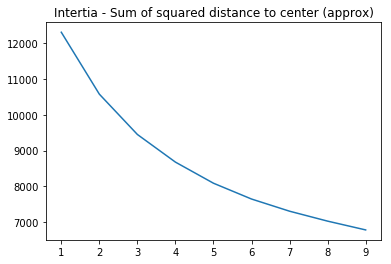

In [69]:
plt.plot(K,dist_points_from_cluster_center )
plt.title('Intertia - Sum of squared distance to center (approx)')
plt.show()

#### Accuracy

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_tr, y_tr)
print('K-NN untuned model accuracy: {:.3f}'.format(knn_model.score(X_va, y_va)))
print('K-NN untuned f1_score: {:.3f}'.format(f1_score(y_true=y_va, y_pred=knn_model.predict(X_va))))

K-NN untuned model accuracy: 0.643
K-NN untuned f1_score: 0.310


**Intermediary Comments:** *(Note that ML models on EMEA only to aboid bias of super_regions)*
* Based on above ML models, features most important to predict classes seems to be "tpppd","wpppd" and "Pitch_rate"
* Trying below to see if can see clear clusters with scatter plot on two of those 3 dimensions
* After this will try with dimensionality reduction (PCA)

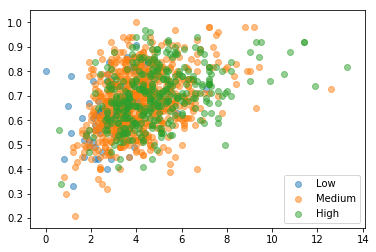

In [71]:
for p in df_clean_final['perf'].unique():
    plt.scatter(x=df_clean_final[df_clean_final['perf'] == p]['wpppd'], y=df_clean_final[df_clean_final['perf'] == p]['Pitch_rate'], alpha=0.5, label=p)
plt.legend()
plt.show()

In [72]:
np.append(df_clean_final['region'].unique(),'all')

array(['North America', 'EMEA', 'Latin America', 'Asia Pacific', 'all'],
      dtype=object)

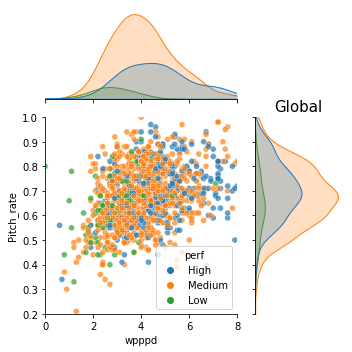

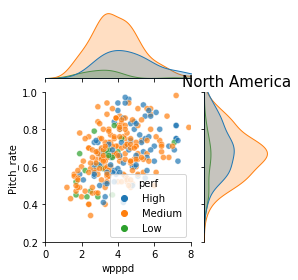

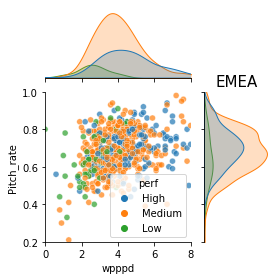

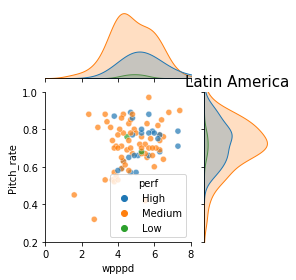

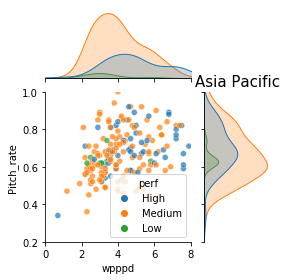

In [73]:
import seaborn as sns
for r in np.append('Global',df_clean_final['region'].unique()):
    if r == 'Global': 
        sns.jointplot(data=df_clean_final, x="wpppd", y="Pitch_rate", hue="perf", hue_order=['High','Medium','Low'] ,xlim=(0,8), ylim=(0.2,1), ratio=2, alpha=0.7, height=5)
    else: 
        sns.jointplot(data=df_clean_final[df_clean_final['region']==r], x="wpppd", y="Pitch_rate", hue="perf", hue_order=['High','Medium','Low'] ,xlim=(0,8), ylim=(0.2,1), ratio=2, alpha=0.7, height=4)
    plt.title(r,fontsize=15)
plt.show()

### (E) Dimensionality reduction (PCA)

#### Non-standardize data

In [74]:
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=2)

# Apply PCA
X_2d = pca.fit_transform(X, y=None); # Unsupervised learning, no y variable

# Get explained variance
print('Explained variance "Non-standardize data":',pca.explained_variance_ratio_)

Explained variance "Non-standardize data": [0.73105766 0.16376945]


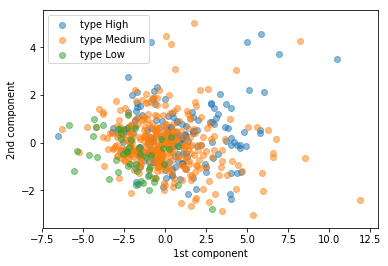

In [75]:
# Plot each kind of wine
fig = plt.figure()
for kind in ['High','Medium','Low']:
    # Wine samples of this type
    idx = (y == kind)

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='type {}'.format(kind), alpha=0.5
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

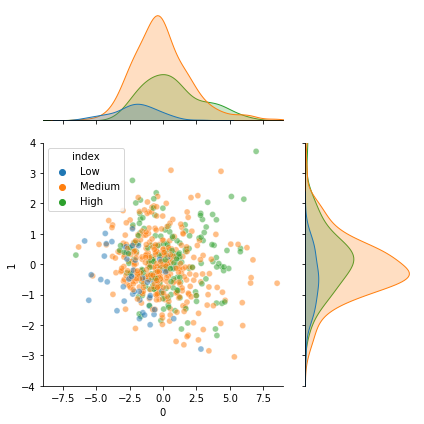

In [76]:
sns.jointplot(x=0, y=1, data=pd.DataFrame(X_2d,y).reset_index(), hue='index', xlim=(-9,9), ylim=(-4,4), ratio=2, alpha=0.5, hue_order=['Low','Medium','High'])
plt.show()

#### Standardize data (PCA)

In [77]:
# Create PCA transformer
pca2 = PCA(n_components=2)

# Apply PCA to rescaled data
X_2d_rescaled = pca2.fit_transform(X_rescaled)

# Get explained variance
print('Explained variance "Standardize data":',np.around(pca2.explained_variance_ratio_, decimals=3))

Explained variance "Standardize data": [0.323 0.221]


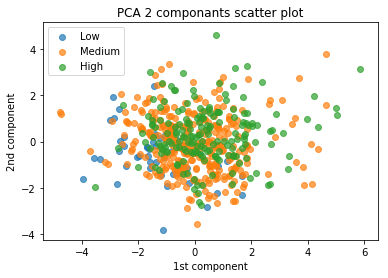

In [78]:
# Plot each kind of wine
fig = plt.figure()
for kind in ['Low','Medium','High']:
    # Wine samples of this type
    idx = (y == kind)

    # Plot their components
    plt.scatter(
        X_2d_rescaled[idx, 0], X_2d_rescaled[idx, 1],
        label=kind, alpha=0.7
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('PCA 2 componants scatter plot')
plt.show()

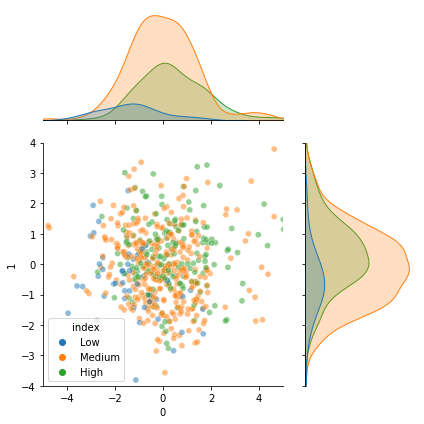

In [79]:
sns.jointplot(x=0, y=1, data=pd.DataFrame(X_2d_rescaled,y).reset_index(), hue='index', xlim=(-5,5), ylim=(-4,4), ratio=2, alpha=0.5, hue_order=['Low','Medium','High'])
plt.show()

In [80]:
pca3 = PCA(n_components=None)
pca3.fit(X_rescaled)
pve = pca3.explained_variance_ratio_
print('Explained variance (all) "Standardize data":',np.around(pve, decimals=3))

Explained variance (all) "Standardize data": [0.323 0.221 0.162 0.135 0.126 0.028 0.006]


## Final comments
* High performers show higher performance on almost all metrics across all super regions
* Some of the input metrics are highly correlated to each other => This shall mean that with dimensionality reduction (or picking only most significant metrics) we shall be able to cluster team members performance
    * Team members clustering even at Super Region level (i.e. EMEA) seems hard with only 2 metrics
    * k-nn unsupervised clustering (K-means) also reach low accuracy
* ML models reaching accuracy and f1 scores similar to baseline => hard to classify with models
* 9-box framing based on WHAT and HOW. HOW harder to assess with those metrics (expect potentially 'Pitch_rate') + Engagement?

## Next steps
* More feature engineering (add data points from Quarter-over-quarter improvements) to feed data analysis => impact of recency (most recent performance has more impact, i.e. repeat box plots per quarter)
* More feature engineering to feed ML models
* Cluster team members in High by perf on one metric (i.e.: tppp) and see performance on other metric => Are team members reaching high tpppd the same reaching high results on other metrics?
    * profiles

### Ad-hoc (High performers profiles)
* Creating buckets would have expectated that among high performers different profiles can be extracted
* High performers with high performance in tpppd are also the ones with high performance on the other metrics (this invalidate above hypothesis that you can have high volume and high success rate for example)

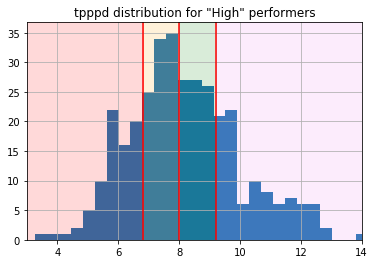

In [81]:
df_clean_final[df_clean_final['perf'] == 'High']['tpppd'].hist(bins=30)
plt.axvline(x=df_clean_final[df_clean_final['perf'] == 'High']['tpppd'].quantile(0.25), color='red')
plt.axvline(x=df_clean_final[df_clean_final['perf'] == 'High']['tpppd'].quantile(0.50), color='red')
plt.axvline(x=df_clean_final[df_clean_final['perf'] == 'High']['tpppd'].quantile(0.75), color='red')
plt.axvspan(xmin=df_clean_final[df_clean_final['perf'] == 'High']['tpppd'].min(),xmax=df_clean_final[df_clean_final['perf'] == 'High']['tpppd'].quantile(0.25), color='red', alpha=0.15)
plt.axvspan(xmin=df_clean_final[df_clean_final['perf'] == 'High']['tpppd'].quantile(0.25),xmax=df_clean_final[df_clean_final['perf'] == 'High']['tpppd'].quantile(0.50), color='orange', alpha=0.15)
plt.axvspan(xmin=df_clean_final[df_clean_final['perf'] == 'High']['tpppd'].quantile(0.50),xmax=df_clean_final[df_clean_final['perf'] == 'High']['tpppd'].quantile(0.75), color='green', alpha=0.15)
plt.axvspan(xmin=df_clean_final[df_clean_final['perf'] == 'High']['tpppd'].quantile(0.75),xmax=df_clean_final[df_clean_final['perf'] == 'High']['tpppd'].max(), color='violet', alpha=0.15)
plt.xlim((3,14))
plt.title('tpppd distribution for "High" performers')
plt.show()

In [82]:
print('Examples of "High" performers with low "tpppd"')
df_high = df_clean_final[df_clean_final['perf'] == 'High']
df_high[df_high['tpppd'] < 5]

Examples of "High" performers with low "tpppd"


,ID,Year,active_days,tpppd,opppt,Pitch_rate,Success Rate,wpppd,labs,shadows,share_proactive,region,Job_Title,perf,Tenure,Time in Grade,Time in Job,Time In Position
101,20182.4,2020,45,2.5,1.8,0.56,0.13,0.6,9.0,7.0,0.08,EMEA,Market Manager,High,10.27,6.75,6.74,7.91
797,56100.8,2020,178,4.4,1.7,0.56,0.27,1.9,10.0,14.0,0.20,North America,Associate Market Manager,High,4.66,4.66,3.38,1.04
1043,62412.0,2020,32,3.6,0.6,0.34,0.33,0.7,2.0,3.0,0.06,Asia Pacific,Market Associate,High,3.49,3.50,3.49,3.49
1294,65688.0,2020,39,4.6,2.6,0.68,0.61,7.1,4.0,2.0,0.17,EMEA,Market Manager,High,3.03,3.04,3.03,3.03
1343,66203.2,2020,42,4.5,3.0,0.88,0.36,4.9,2.0,2.0,0.08,EMEA,Market Associate,High,2.98,2.98,2.98,2.98
1487,68526.4,2020,186,3.8,1.9,0.53,0.30,2.1,8.0,11.0,0.16,North America,Associate Market Manager,High,2.63,2.63,1.70,1.70


In [83]:
df_high['tpppd_buckets'] = (df_high['tpppd'] > df_high['tpppd'].quantile(0.25)) * 1 + (df_high['tpppd'] > df_high['tpppd'].quantile(0.50)) * 1 + (df_high['tpppd'] > df_high['tpppd'].quantile(0.75)) * 1
df_high['tpppd_buckets'].replace({0:'Low',1:'Medium',2:'High',3:'Very high'}, inplace=True)

C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [84]:
print('"High" performers buckets by quantile on "tpppd"')
df_high.drop(columns=['ID','Year']).groupby('tpppd_buckets').median().sort_values(by='tpppd', ascending=False)

"High" performers buckets by quantile on "tpppd"


,active_days,tpppd,opppt,Pitch_rate,Success Rate,wpppd,labs,shadows,share_proactive,Tenure,Time in Grade,Time in Job,Time In Position
tpppd_buckets,,,,,,,,,,,,,
Very high,196,10.4,2.40,0.740,0.260,6.6,12.0,12.0,0.12,4.47,3.38,2.49,2.910
High,194,8.7,2.35,0.705,0.240,4.9,12.0,13.0,0.12,4.45,2.88,2.36,2.245
Medium,184,7.5,2.20,0.660,0.240,4.0,11.0,13.0,0.13,3.80,3.05,2.87,2.550
Low,175,6.1,2.40,0.685,0.255,3.7,10.5,11.0,0.12,4.54,3.00,2.87,2.840
